In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from geopy.geocoders import Nominatim

# Read  & Analyse Data 

In [2]:
df_houses = pd.read_csv(r'kc_house_data.csv')
pd.set_option('display.max_columns', None) # Display all columns 

In [3]:
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df_houses.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df_houses.duplicated().sum()

0

In [7]:
# Splitting Data into two Data frames one for Categorical , one for Quantitive data & other types  
df_houses_copy = df_houses.copy()

df_houses_category = df_houses_copy[['waterfront' , 'view' , 'condition']]
df_houses_other = df_houses_copy[['date' ,'zipcode','lat','long']]

df_houses_quant = df_houses_copy.drop(df_houses_category.columns, axis = 1)
df_houses_quant = df_houses_quant.drop(df_houses_other.columns, axis = 1)

# Cleaning Data 

### Quantitive Data Cleaning 

In [8]:
df_houses_quant['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
# Drop Id(it's not formated) & yr_renovated(we have a missing Data Collection)
df_houses_quant.drop(['id' , 'yr_renovated'] , axis = 1 , inplace = True)

In [10]:
df_houses_quant

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,8,1680,0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,8,1530,0,2009,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,8,2310,0,2014,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,7,1020,0,2009,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,8,1600,0,2004,1410,1287


In [11]:
# I choose int32 instead of int64 because this columns has a small values so that's have a small space in memory
df_houses_quant = df_houses_quant.astype({'bathrooms' : 'int32' , 'floors': 'int32' })

In [12]:
df_houses_quant

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,7,1180,0,1955,1340,5650
1,538000.0,3,2,2570,7242,2,7,2170,400,1951,1690,7639
2,180000.0,2,1,770,10000,1,6,770,0,1933,2720,8062
3,604000.0,4,3,1960,5000,1,7,1050,910,1965,1360,5000
4,510000.0,3,2,1680,8080,1,8,1680,0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3,8,1530,0,2009,1530,1509
21609,400000.0,4,2,2310,5813,2,8,2310,0,2014,1830,7200
21610,402101.0,2,0,1020,1350,2,7,1020,0,2009,1020,2007
21611,400000.0,3,2,1600,2388,2,8,1600,0,2004,1410,1287


### Other Data Cleaning 

In [13]:
# Solve Wrong Date input format
df_houses_other['date'] = pd.to_datetime(df_houses_other['date'])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12684\3006892683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses_other['date'] = pd.to_datetime(df_houses_other['date'])


In [14]:
df_houses_other

,date,zipcode,lat,long
0,2014-10-13,98178,47.5112,-122.257
1,2014-12-09,98125,47.7210,-122.319
2,2015-02-25,98028,47.7379,-122.233
3,2014-12-09,98136,47.5208,-122.393
4,2015-02-18,98074,47.6168,-122.045
...,...,...,...,...
21608,2014-05-21,98103,47.6993,-122.346
21609,2015-02-23,98146,47.5107,-122.362
21610,2014-06-23,98144,47.5944,-122.299
21611,2015-01-16,98027,47.5345,-122.069


# Summarizing Data

### Summarize Quantitive Data

In [15]:
df_houses_quant.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,7.656873,1788.390691,291.509045,1971.005136,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,1.175459,828.090978,442.575043,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,8.000000,2210.000000,560.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


In [16]:
df_houses_quant.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.510072,0.702035,0.089661,0.237211,0.667434,0.605567,0.323816,0.054012,0.585379,0.082447
bedrooms,0.308350,1.000000,0.467452,0.576671,0.031703,0.155643,0.356967,0.477600,0.303093,0.154178,0.391638,0.029244
bathrooms,0.510072,0.467452,1.000000,0.697875,0.085310,0.484822,0.606631,0.639933,0.250880,0.433647,0.510049,0.080779
sqft_living,0.702035,0.576671,0.697875,1.000000,0.172826,0.353321,0.762704,0.876597,0.435043,0.318049,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.085310,0.172826,1.000000,-0.008951,0.113621,0.183512,0.015286,0.053080,0.144608,0.718557
floors,0.237211,0.155643,0.484822,0.353321,-0.008951,1.000000,0.472608,0.517913,-0.235836,0.578619,0.296561,-0.013252
grade,0.667434,0.356967,0.606631,0.762704,0.113621,0.472608,1.000000,0.755923,0.168392,0.446963,0.713202,0.119248
sqft_above,0.605567,0.477600,0.639933,0.876597,0.183512,0.517913,0.755923,1.000000,-0.051943,0.423898,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.250880,0.435043,0.015286,-0.235836,0.168392,-0.051943,1.000000,-0.133124,0.200355,0.017276
yr_built,0.054012,0.154178,0.433647,0.318049,0.053080,0.578619,0.446963,0.423898,-0.133124,1.000000,0.326229,0.070958


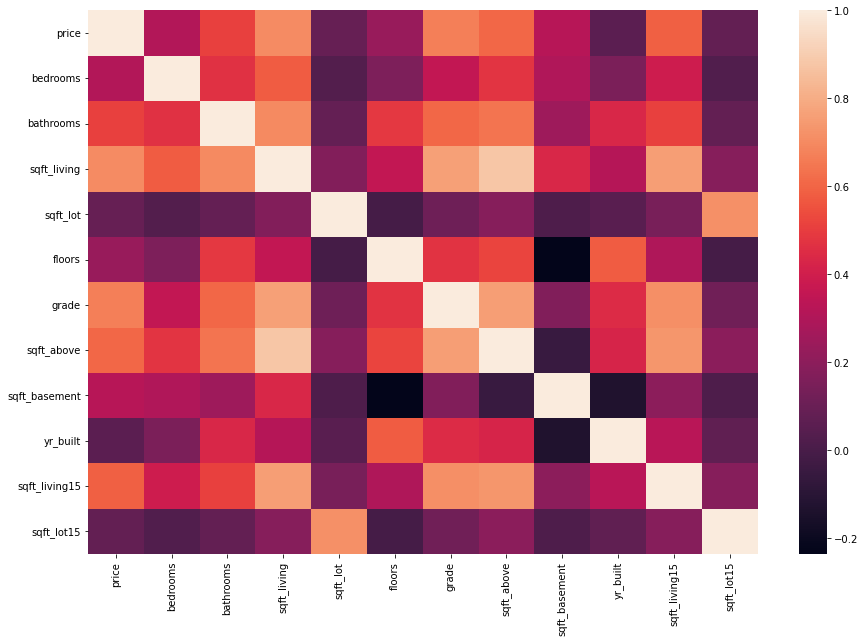

In [163]:
# I Predict that the Grade & Squre Area of Living are the most two things corrolate with the Price of the house 
plt.figure(figsize = (15,10))
sns.heatmap(df_houses_quant.corr());

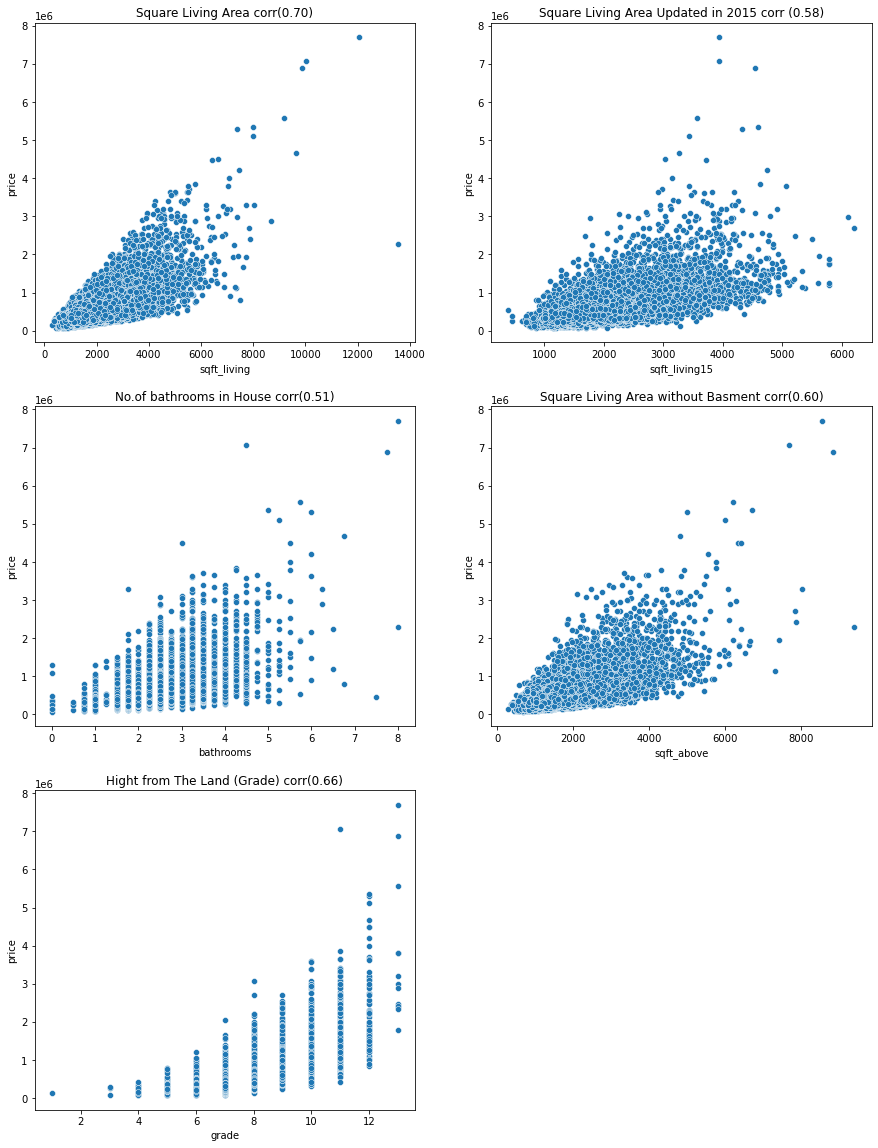

In [164]:
# Plot the distribution of correlated columns 
# for the The area of living after 2015 update the price decrease compare to before the update 

fig ,ax = plt.subplots(figsize = (15,20))

plt.subplot(3,2,1)
plt.title('Square Living Area corr(0.70)')
sns.scatterplot(data = df_houses , x = 'sqft_living' , y = 'price')

plt.subplot(3,2,5)
plt.title('Hight from The Land (Grade) corr(0.66)')
sns.scatterplot(data = df_houses , x = 'grade' , y = 'price')

plt.subplot(3,2,3)
plt.title('No.of bathrooms in House corr(0.51)')
sns.scatterplot(data = df_houses , x = 'bathrooms' , y = 'price')

plt.subplot(3,2,4)
plt.title('Square Living Area without Basment corr(0.60)')
sns.scatterplot(data = df_houses , x = 'sqft_above' , y = 'price')

plt.subplot(3,2,2)
plt.title('Square Living Area Updated in 2015 corr (0.58)')
sns.scatterplot(data = df_houses , x = 'sqft_living15' , y = 'price');


### Summarize Categorical Data 

In [19]:
df_houses_category.head()

,waterfront,view,condition
0,0,0,3
1,0,0,3
2,0,0,3
3,0,0,5
4,0,0,3


In [20]:
df_houses_category['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [21]:
df_houses_category['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [22]:
df_houses_category['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

### Summarize other Data 

### Find Location form Zipcode

In [121]:
zipcode = []
for i , j in df_houses_other.iterrows():
    zipcode.append(int(j[0]))
len(zipcode) 

21613

In [99]:
# Using Nominatim Api to find the 
geolocator = Nominatim(user_agent="geoapiExercises")

location = []
for i in zipcode[0:2000] :
    x = geolocator.geocode(i)
    location.append(x)

In [122]:
for i in zipcode[21400:21613] :
    x = geolocator.geocode(i)
    location.append(x)

In [150]:
location_upd = []
for i in location:
    location_upd.append(i[0])

country = []
city = []
for i in location_upd:
    country.append(i.split(',')[-1])
    city.append(i.split(',')[1])

In [157]:
df_houses_other['city']  = city
df_houses_other['country']  = country


In [159]:
df_houses_other.drop(['zipcode' , 'lat' , 'long'] , axis = 1 , inplace=True)

In [27]:
# Split Date to year , month & day columns 
df_houses_other["year"] = df_houses_other["date"].dt.year
df_houses_other["month"] = df_houses_othe+r["date"].dt.month
df_houses_other["day"] = df_houses_other["date"].dt.day
df_houses_other.drop('date' , axis = 1 , inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12684\903893219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses_other["year"] = df_houses_other["date"].dt.year
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12684\903893219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses_other["month"] = df_houses_other["date"].dt.month
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12684\903893219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [162]:
df_houses_other

,year,month,day,city,country
0,2014,10,13,Washington,United States
1,2014,12,9,Messina,Italia
2,2015,2,25,King County,United States
3,2014,12,9,Messina,Italia
4,2015,2,18,King County,United States
...,...,...,...,...,...
21608,2014,5,21,King County,United States
21609,2015,2,23,King County,United States
21610,2014,6,23,King County,United States
21611,2015,1,16,Washington,United States


In [260]:
country_ser = df_houses_other['country'].value_counts()
country_ser

 United States    19270
 Italia            2343
Name: country, dtype: int64

In [258]:
city_ser = df_houses_other['city'].value_counts()
city_ser

 King County                16672
 Messina                     2343
 Washington                  2193
 Union Hill-Novelty Hill      405
Name: city, dtype: int64

In [175]:
# So we have 1 City in Italy and other cities in USA
df_houses_other.groupby('city')['country'].sum()

city
 King County                 United States United States United States Uni...
 Messina                     Italia Italia Italia Italia Italia Italia Ita...
 Union Hill-Novelty Hill     United States United States United States Uni...
 Washington                  United States United States United States Uni...
Name: country, dtype: object

In [241]:
# Best year for selling is 2014
year = df_houses_other['year'].value_counts() # Category
year

2014    14633
2015     6980
Name: year, dtype: int64

In [246]:
# Most Monthly sell in May
month = df_houses_other['month'].value_counts() # Category
month

5     2414
4     2231
7     2211
6     2180
8     1940
10    1878
3     1875
9     1774
12    1471
11    1411
2     1250
1      978
Name: month, dtype: int64

In [253]:
# Most Sell in Day 23 
day = df_houses_other['day'].value_counts() # Category
day


23    906
9     808
5     807
24    801
20    787
16    759
17    748
27    745
22    742
13    741
25    740
8     740
2     737
10    732
6     719
12    719
18    717
11    700
3     682
4     679
26    670
29    659
21    658
14    655
7     650
19    646
15    623
28    612
30    611
1     569
31    251
Name: day, dtype: int64

In [202]:
df_updated = pd.concat([df_houses_quant , df_houses_category] , axis = 1  )
df_updated = pd.concat([df_updated , df_houses_other] , axis = 1  ) 

In [204]:
df_updated.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,waterfront,view,condition,year,month,day,city,country
0,221900.0,3,1,1180,5650,1,7,1180,0,1955,1340,5650,0,0,3,2014,10,13,Washington,United States
1,538000.0,3,2,2570,7242,2,7,2170,400,1951,1690,7639,0,0,3,2014,12,9,Messina,Italia
2,180000.0,2,1,770,10000,1,6,770,0,1933,2720,8062,0,0,3,2015,2,25,King County,United States
3,604000.0,4,3,1960,5000,1,7,1050,910,1965,1360,5000,0,0,5,2014,12,9,Messina,Italia
4,510000.0,3,2,1680,8080,1,8,1680,0,1987,1800,7503,0,0,3,2015,2,18,King County,United States


In [205]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int32  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  int32  
 6   grade          21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  sqft_living15  21613 non-null  int64  
 11  sqft_lot15     21613 non-null  int64  
 12  waterfront     21613 non-null  int64  
 13  view           21613 non-null  int64  
 14  condition      21613 non-null  int64  
 15  year           21613 non-null  int64  
 16  month          21613 non-null  int64  
 17  day            21613 non-null  int64  
 18  city  

# Visualizations 

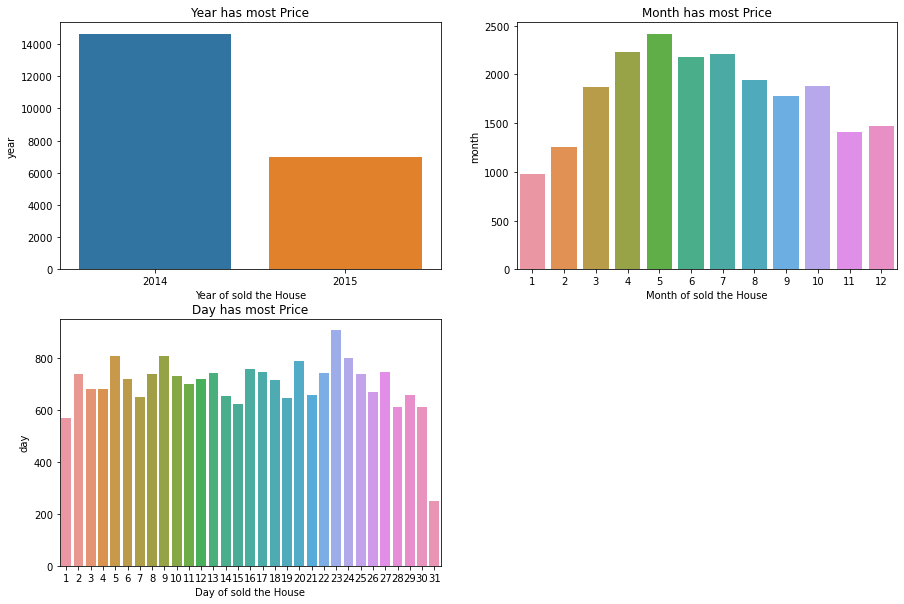

In [256]:
# we predict that we sell in 2014 much than 2015  
fig , ax = plt.subplots(figsize= (15,10))


plt.subplot(2,2,1)
plt.title('Year has most Price')
plt.xlabel('Year of sold the House')
sns.barplot(x=year.index , y =year  )

# Sales become top in summer months from 4 to 10 
plt.subplot(2,2,2)
plt.title('Month has most Price')
plt.xlabel('Month of sold the House')
sns.barplot(x = month.index, y= month )

# All days are nearly for sales  
plt.subplot(2,2,3)
plt.title('Day has most Price')
plt.xlabel('Day of sold the House')
sns.barplot(x = day.index, y= day );


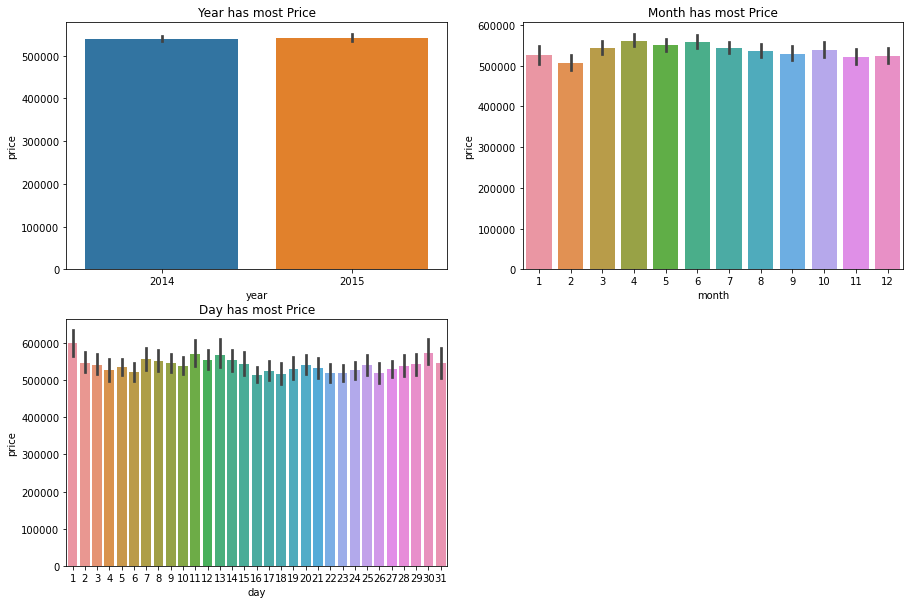

In [225]:
# Times not affect on the amount of money   
fig , ax = plt.subplots(figsize= (15,10))

plt.subplot(2,2,1)
plt.title('Year has most Price')
plt.xlabel('Year of sold the House')
sns.barplot(data  =df_updated , x= 'year' , y = 'price' )

# All months are nearly for gaining money  
plt.subplot(2,2,2)
plt.title('Month has most Price')
plt.xlabel('Month of sold the House')
sns.barplot(data  =df_updated , x= 'month' , y = 'price' )

# All days are nearly for gaining money  
plt.subplot(2,2,3)
plt.title('Day has most Price')
plt.xlabel('Day of sold the House')
sns.barplot(data  =df_updated , x= 'day' , y = 'price');


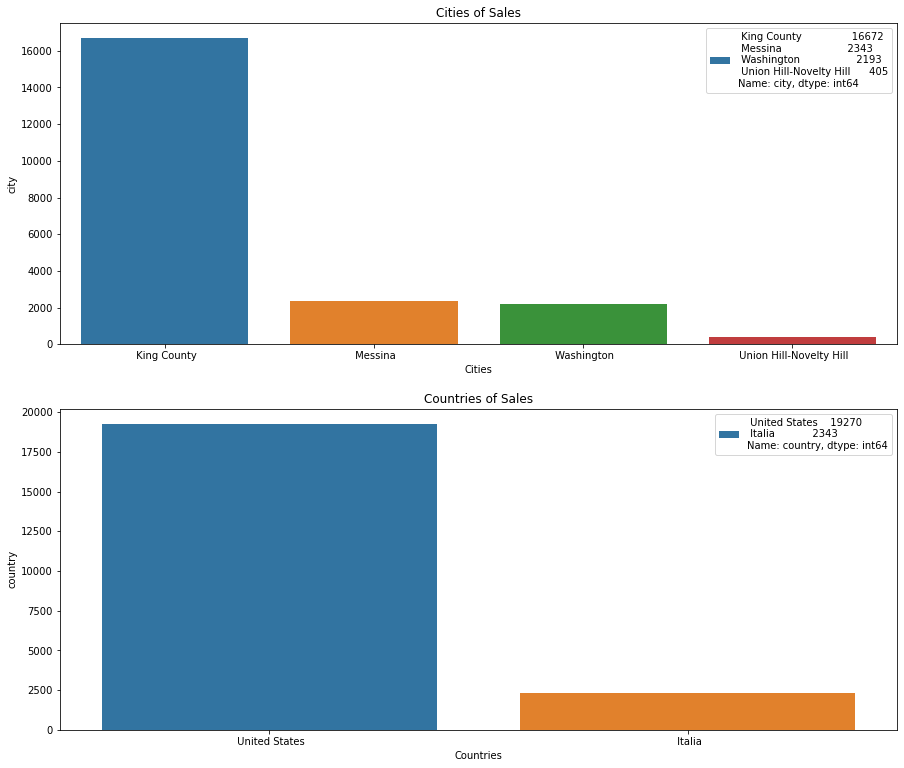

In [287]:
# Most of Our Sales are in USA country specify in King County City 
fig , ax = plt.subplots(figsize= (15,13))

plt.subplot(2,1,1)
plt.title('Cities of Sales')
plt.xlabel('Cities')
sns.barplot(x = city_ser.index, y= city_ser , label = city_ser)
plt.legend()

plt.subplot(2,1,2)
plt.title('Countries of Sales')
plt.xlabel('Countries')
sns.barplot( x=country_ser.index , y = country_ser , label = country_ser);
plt.legend();

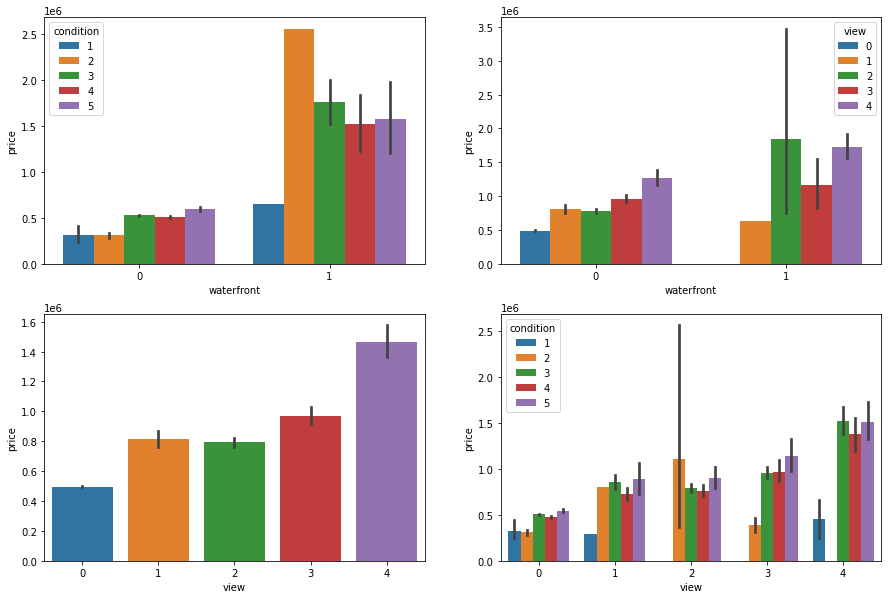

In [226]:
# We can pedict that most houses has a waterfront view in intermidiate level of condition 
fig , ax = plt.subplots(figsize= (15,10))

plt.subplot(2,2,1)
sns.barplot(data  =df_updated , x= 'waterfront' , y = 'price' , hue = 'condition')

# most of houses has a rating in view 2 & 4 
plt.subplot(2,2,2)
sns.barplot(data  =df_updated , x= 'waterfront' , y = 'price' , hue = 'view')

# Normal distibution because the view affect the picing of the house 
plt.subplot(2,2,3)
sns.barplot(data  =df_updated , x= 'view' , y = 'price')

# Houses with Best view has a most best conditions so it's the expensive 
plt.subplot(2,2,4)
sns.barplot(data  =df_updated , x= 'view' , y = 'price', hue = 'condition');


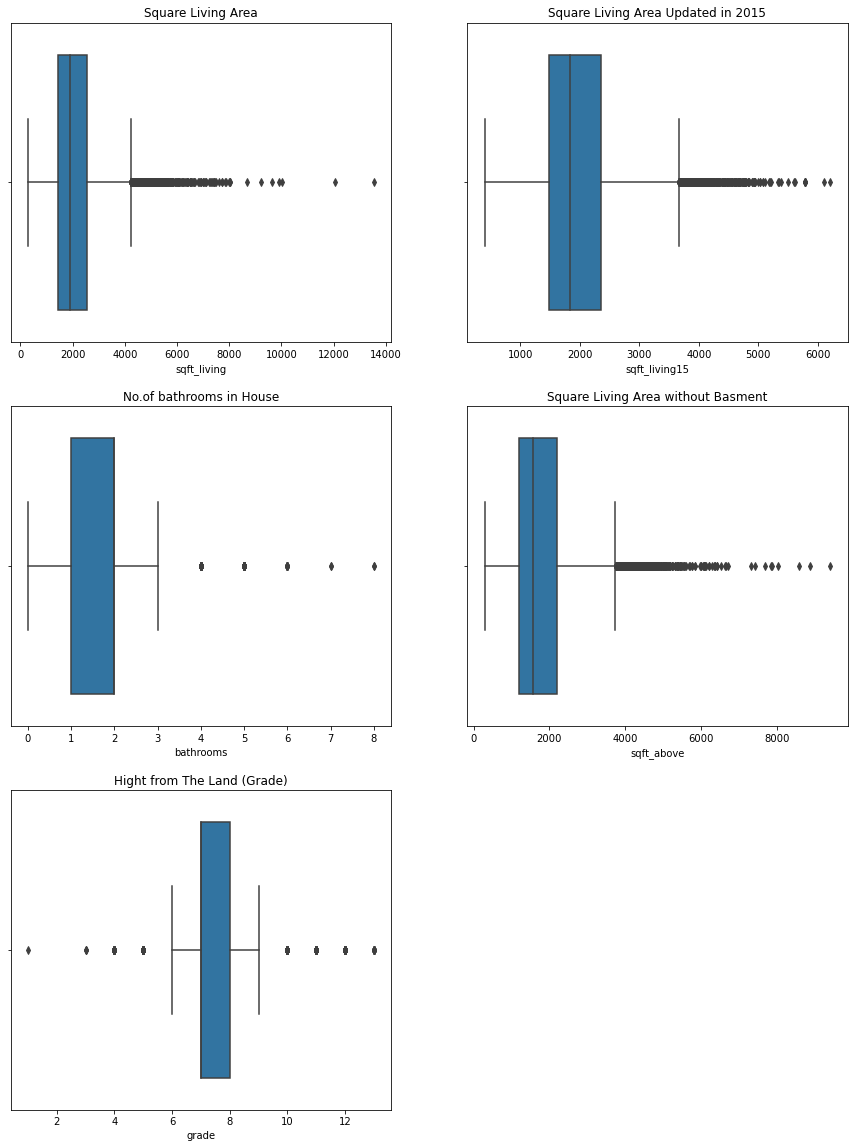

In [227]:
# Now we will Check about outliers that makes a noise on our Data 

fig ,ax = plt.subplots(figsize = (15,20))

plt.subplot(3,2,1)
plt.title('Square Living Area')
sns.boxplot(data = df_updated , x = 'sqft_living' )

plt.subplot(3,2,5)
plt.title('Hight from The Land (Grade)')
sns.boxplot(data = df_updated, x = 'grade')

plt.subplot(3,2,3)
plt.title('No.of bathrooms in House')
sns.boxplot(data = df_updated , x = 'bathrooms' )

plt.subplot(3,2,4)
plt.title('Square Living Area without Basment')
sns.boxplot(data = df_updated, x = 'sqft_above' )

plt.subplot(3,2,2)
plt.title('Square Living Area Updated in 2015')
sns.boxplot(data = df_updated , x = 'sqft_living15' );


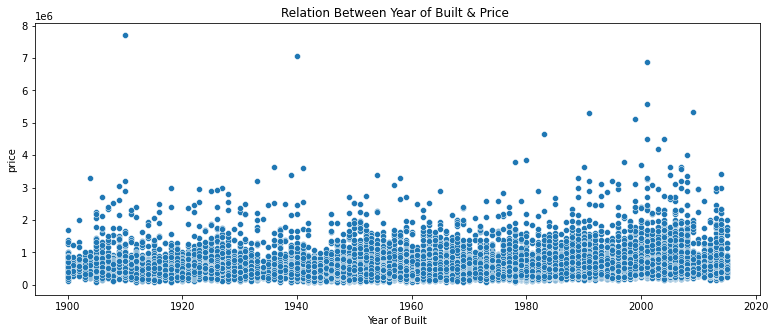

In [228]:
# No effect on the Price 
plt.figure(figsize = (13,5))
plt.title('Relation Between Year of Built & Price ')
plt.xlabel('Year of Built')
sns.scatterplot(data = df_updated , x = 'yr_built' , y = 'price');

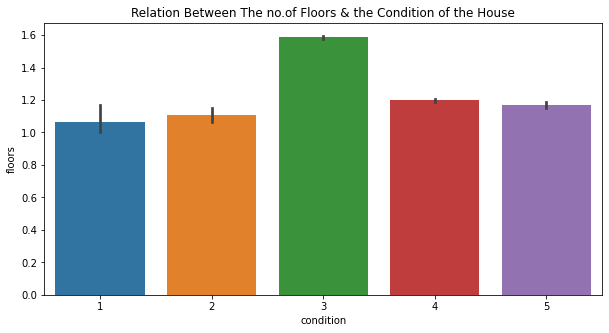

In [229]:
# no of floors has a low effective on the condition of the house 
plt.figure(figsize = (10,5))
plt.title('Relation Between The no.of Floors & the Condition of the House')
sns.barplot(data  =df_updated , x= 'condition' , y = 'floors');

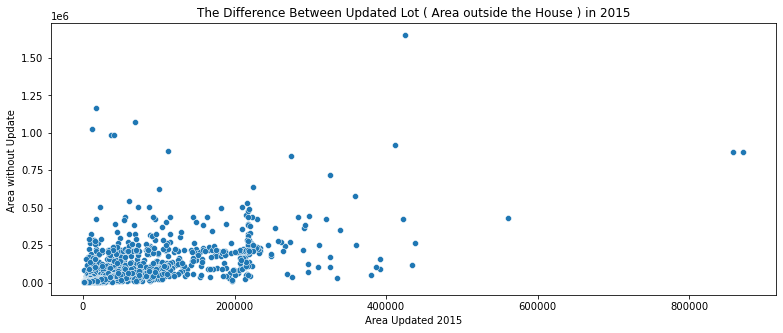

In [230]:
# Most of Areas not updated 
plt.figure(figsize = (13,5))
plt.title('The Difference Between Updated Lot ( Area outside the House ) in 2015')
plt.xlabel('Area Updated 2015')
plt.ylabel("Area without Update ")
sns.scatterplot(data = df_updated , x = 'sqft_lot15' , y = 'sqft_lot');

In [ ]:
# Edit on Bathrooms  